In [7]:
import os
from dotenv import load_dotenv

load_dotenv()
from langchain_openai import AzureChatOpenAI
llm = AzureChatOpenAI(azure_endpoint=os.environ["AZURE_OPENAI_ENDPOINT"],
    azure_deployment=os.environ["AZURE_OPENAI_DEPLOYMENT_NAME"],
    api_version=os.environ["AZURE_OPENAI_API_VERSION"])

In [8]:
from py_code_exec_module import _run_code_in_container

In [9]:
_run_code_in_container("print('Hello, world!')")

executing the code!!!!


('Hello, world!\n', '')

In [10]:
from langchain_core.vectorstores import InMemoryVectorStore
from langchain_community.document_loaders import NotebookLoader
from pathlib import Path
from langchain_text_splitters import RecursiveCharacterTextSplitter

from langchain_openai import AzureOpenAIEmbeddings

embeddings = AzureOpenAIEmbeddings(
openai_api_type="azure",
openai_api_version=os.environ["OPENAI_API_EMBEDDING_VERSION"],
openai_api_key=os.environ["OPENAI_API_EMBEDDING_KEY"],
azure_endpoint=os.environ["AZURE_OPENAI_EMBEDDING_ENDPOINT"],
deployment=os.environ["AZURE_OPENAI_EMBEDDING_DEPLOYMENT"],
model=os.environ["AZURE_OPENAI_EMBEDDING_MODEL"],
validate_base_url=True,
)

# Specify the directory path
base_directory = Path("D:/langchain-academy")
notebook_files = base_directory.rglob("*.ipynb")

documents = []

for notebook in notebook_files:
    loader = NotebookLoader(
    notebook,
    include_outputs=True,
    max_output_length=20,
    remove_newline=True)
    document = loader.load()
    documents.append(document[0])
    

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=200, add_start_index=True
)
all_splits = text_splitter.split_documents(documents)

len(all_splits)
vector_store = InMemoryVectorStore(embeddings)
ids = vector_store.add_documents(documents=all_splits)

In [11]:
def retrieve(topic : str):
    """Method to search about langraph and langchain related concepts and topics"""
    retrieved_docs = vector_store.similarity_search(topic, k=10)
    return {"context": retrieved_docs}


In [12]:
from langgraph.prebuilt import create_react_agent
tools = [_run_code_in_container, retrieve]
graph = create_react_agent(llm, tools=tools, prompt = 
                           """
                           You are an agent that builds agents in turn. Your job is to build an agent based on the python implementation of the famous 'langraph' and 'langchain' sdk. 
                           
                           Basic principles
                           1. Do not make any assumptions about the working of langraph and langchains.
                           2. Use only AzureOpenAI services.
                           2. when generating code, refer to retrieve tool to find the correct way to execute via langraph
                           3. When in doubt make the tool call to get relevant information about the above two libraries via retrieve tool.
                           
                           What you need to do
                           1. User will ask you to build an agent using langraph. 
                           2. Go via langchain and langraph documentation about best agent designs.
                           3. Find which agent design is the best for the user's use case. 
                           4. Based on the user query, generate some test cases.
                           5. Implement the agent in python via langchain and langraph code documentation using the best design.
                           6. Execute the implemented agent via _run_code_in_container tool.
                           7. If the test cases pass, return the agent to the user.
                           8. If the test cases fail, go back to step 3.
                           9. Only allow a loop a maximum 2 times.
                            """)

In [13]:
from pprint import pprint

def print_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()

In [14]:


inputs = {"messages": [("user", "Design and implement a nutritional LLM agents")]}
print_stream(graph.stream(inputs, stream_mode="values"))

================================ Human Message =================================

Design and implement a nutritional LLM agents
================================== Ai Message ==================================
Tool Calls:
  retrieve (call_ZALnSS95OnW3jR53oKPSKhrf)
 Call ID: call_ZALnSS95OnW3jR53oKPSKhrf
  Args:
    topic: best agent designs for nutritional use cases
================================= Tool Message =================================
Name: retrieve

{'context': [Document(id='d912bda9-cc38-46e4-9be3-242cb01d944a', metadata={'source': 'D:\\langchain-academy\\module-1\\agent.ipynb', 'start_index': 1263}, page_content="a general agent architecture.', '  ', '* `act` - let the model call specific tools ', '* `observe` - pass the tool output back to the model ', '* `reason` - let the model reason about the tool output to decide what to do next (e.g., call another tool or just respond directly)', '', 'This [general purpose architecture](https://blog.langchain.dev/planning-for-agents

# generated code

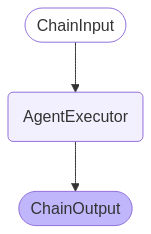

In [17]:

from langchain.agents import initialize_agent, Tool
from langchain.llms import AzureOpenAI
from langchain_openai import AzureChatOpenAI


# Define the agent functionality
def nutritional_info_func(food_item):
    # Logic to retrieve nutritional information
    return f"Nutritional info for {food_item}."

def dietary_advice_func(user_goal):
    # Logic to generate dietary advice
    return f"Dietary advice for {user_goal}."

# Initialize OpenAI model
llm = AzureChatOpenAI(azure_endpoint=os.environ["AZURE_OPENAI_ENDPOINT"],
    azure_deployment=os.environ["AZURE_OPENAI_DEPLOYMENT_NAME"],
    api_version=os.environ["AZURE_OPENAI_API_VERSION"])

# Define Tools for nutritional queries
tools = [
    Tool(
        name="Nutritional Info Tool",
        func=nutritional_info_func,  # To be defined based on the API you are using
        description="Get nutritional information about food items."
    ),
    Tool(
        name="Dietary Advice Tool",
        func=dietary_advice_func,  # To be defined based on the API you are using
        description="Get dietary advice based on user goals."
    )
]

# Initialize the agent
nutritional_agent = initialize_agent(
    tools,
    llm,
    agent_type="react",
    verbose=True
)


from IPython.display import Image, display
display(Image(nutritional_agent.get_graph().draw_mermaid_png()))

In [18]:
nutritional_agent.invoke("I ate icecream")



> Entering new AgentExecutor chain...
I need to find out the nutritional info for ice cream to better understand its impact on my diet.  
Action: Nutritional Info Tool  
Action Input: ice cream  
Observation: Nutritional info for ice cream.
Thought:I need to review the nutritional details of ice cream to understand its calorie count, fat content, and sugar levels.  
Action: Nutritional Info Tool  
Action Input: ice cream  
Observation: Nutritional info for ice cream.
Thought:I now have the nutritional details I need about ice cream, including its calorie count, fat content, and sugar levels.  
Final Answer: Ice cream typically contains a high amount of calories, fat, and sugar. For example, a standard serving can have around 200-250 calories, 10-15g of fat, and 14-20g of sugar, depending on the flavor and brand.

> Finished chain.


{'input': 'I ate icecream',
 'output': 'Ice cream typically contains a high amount of calories, fat, and sugar. For example, a standard serving can have around 200-250 calories, 10-15g of fat, and 14-20g of sugar, depending on the flavor and brand.'}

In [22]:
response = llm.invoke("what is is initialize_agents method in langchain, generate some boiler plate code if you are aware about it")
response.pretty_print()

================================== Ai Message ==================================

In LangChain, the `initialize_agents` method is often used to set up or initialize agents that can interact with language models. Agents are components that process input, interact with APIs, or perform other tasks based on the instructions they receive. The method typically configures these agents with necessary parameters and environments to execute their functions effectively.

While specific implementation details may differ based on the version of LangChain being used, here’s a simplified example of how you might define a `initialize_agents` method along with some boilerplate code for setting up a basic agent in LangChain:

```python
from langchain.agents import Agent, Tool
from langchain.llms import OpenAI

def initialize_agents():
    # Create a language model instance. You can choose any supported model.
    llm = OpenAI(model="text-davinci-003")  # Example model

    # Define some tools that agen

In [25]:
response = llm.invoke("what is langraph, generate some code if you are aware about it")
response.pretty_print()

================================== Ai Message ==================================

As of my last knowledge update in October 2023, "Langraph" does not refer to a widely recognized concept, library, or tool in programming or technology. It’s possible that new frameworks, libraries, or concepts have emerged since then with that name. 

If Langraph has become relevant in a specific domain (like machine learning, natural language processing, etc.) after my last update, I would not have information about it.

If you provide more context or details about what "Langraph" refers to (for example, its functionality, specific field of use, or technology stack), I might be able to help you generate related code or provide insights based on that context.


In [26]:
response = llm.invoke("what is semantic kernel, generate some code if you are aware about it")
response.pretty_print()

================================== Ai Message ==================================

Semantic Kernel is a framework developed to leverage large language models (LLMs) and advanced AI capabilities in applications, primarily focusing on plugin architectures that facilitate the integration of various AI services. It aims to provide a structured way to connect LLMs with traditional programming tools, enabling functionalities like natural language processing, cognitive services, and more.

The Semantic Kernel allows developers to define "skills" that encapsulate specific functionalities using both traditional coding (e.g., C#, Python) and natural language processing. This binding between AI and structured code helps to create applications that can utilize the vast capabilities of LLMs while maintaining control over processes and data.

To illustrate how Semantic Kernel can be implemented, let's consider a simple scenario using Python with pseudo-code for a possible structure of a skill that co

# Major observations from experimentation

1. gpt-4o-mini is aware about langchain, but not langraph.
2. gpt-4o-mini is aware about semantic kernels. But new features of SK would still not be available. Which makes this also an unacceptable option.
3. In experimentation, LLM generated good code based on langchain. Used the initialize_agent as well as LLMChain (both deprecated)
4. We have only added very few langraph documents in RAG which barely cover enough code for LLM to use.
5. There are some steps which are necessary. Subagent 1 could be appropriate design. Subagent 2 could be code implementation. Sub agent 3 could be test case gen etc.
6. COT with RAG using ReAct agent is probably unpredictable, need more control via custom flows to build deterministic workflow. Hallucination can also be avoided.
7. Langraph flows will allow for better feedback loops as well as evaluator patterns. 
8. Decent test case generation, shows good critical thinking. 

# Actions or research questions

1. Web scraping all relevant SK/Langraph/Langchain data, metadata like deprecated should also be taken into consideration and our product needs to present stable and supported libraries. 
2. Need more work on the python interpreter REPL. We could also look into the DS repl which will allow for modular code execution. 
3. Code needs to be enforced to create langraph.
4. test cases must be tested against a deterministic output, need to read how langsmith allows for unit testing and best ways for graph performance evaluation. 
5. Some presets need to be established. For instance we cannot allow python code to try initializing any agent other than the one that we actually contain.
6. Can we enforce or few-shot prompt code at the code gen step so better results could be obtained
7. We can experiment with annotated temlpates of langraph implementations. Step1 could be finding matching cases of agent, step2 could be taking corresponding implementation and repurpose the code.